<a href="https://colab.research.google.com/github/angrybird05/pyTorch/blob/main/Neural_networks_cassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Networks classification

In [ ]:
#1.making classification dataset
import sklearn
from sklearn.datasets import make_circles

#making samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                       noise = 0.03,
                       random_state =42)

len(X),len(y)

(1000, 1000)

In [ ]:
print(f"X[:5] : {X[:5]}")
print(f"y[:5] : {y[:5]}")

X[:5] : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y[:5] : [1 1 1 1 0]


In [ ]:
#make data frame as circle data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],
                       "X1":X[:,1],
                       "label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


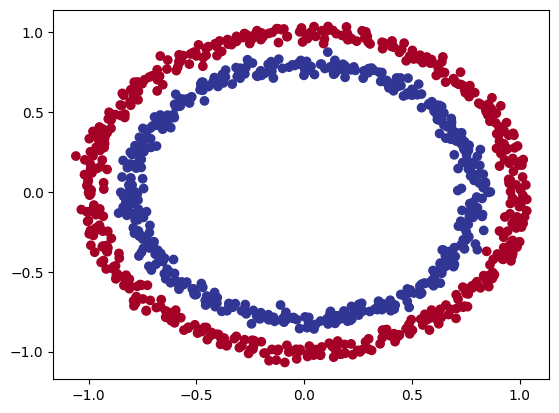

In [ ]:
#graphycal representation
import matplotlib.pyplot as plt
plt.scatter(x = circles["X0"],
           y = circles["X1"],
           c = circles["label"],
           cmap = plt.cm.RdYlBu);

In [ ]:
#checking input and output shapes
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [ ]:
# spliting data into traning and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,
                                                  y,
                                                  test_size=0.2)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

  Building the model
  

In [ ]:
#Building the model
import torch
from torch import nn
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

#constructing a model using sunclassing nn.module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # create nn.layers capable of handling shapes of data

        self.layer_1 = nn.Linear(in_features=2,out_features=10) # takes in 2 features and upscales to 10 features

        self.layer_2 = nn.Linear(in_features=10,out_features=1) #takes in 10 features from previos layer and outputs a single feature (same shape as y)

        self.relu = nn.ReLU() # Add ReLU activation function

         # define forward method that outline the forward pass

def forward(self,x):
            return self.layer_2(self.relu(self.layer_1(x))) #X  -> layer -1 -> ReLU -> layer_2 -> output

#instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#Replicate the model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.ReLU(), # Add ReLU activation function
    nn.Linear(in_features=10,out_features=1)
)
model_0.to(device)
model_0


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4826,  0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217,
                      -0.4217,  0.6360], device='cuda:0')),
             ('2.weight',
              tensor([[ 0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,
                        0.2628, -0.1633]], device='cuda:0')),
             ('2.bias', tensor([-0.2156], device='cuda:0'))])

In [ ]:
# making predections with the model

with torch.inference_mode():
 untrained_preds = model_0(X_test.to(device))
print(f"length of preds : {len(untrained_preds)}")
print(f"shape of preds : {untrained_preds.shape}")
print(f"first 10 preds : {untrained_preds[:10]}")
print(f"first 10 labels : {y_test[:10]}")

length of preds : 200
shape of preds : torch.Size([200, 1])
first 10 preds : tensor([[-0.3707],
        [-0.3151],
        [-0.7558],
        [-0.7759],
        [-0.1936],
        [-0.2281],
        [-0.2805],
        [-0.6631],
        [-0.2849],
        [-0.5968]], device='cuda:0')
first 10 labels : tensor([0., 1., 0., 0., 1., 1., 0., 0., 1., 1.])


In [ ]:
## seetup loss function and optimizer

## for loss function use "torch.nn.BECWithLogiitsLoss()"
loss_fn = nn.BCEWithLogitsLoss() #has sigmoid  activation built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

## calculate acurracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


In [ ]:
## Traning the model
torch.manual_seed(42)

epochs = 4000

#forward pass
for epoch in range(epochs):
    model_0.train() # Put model in training mode
    # 1. Forward pass
    y_logits = model_0(X_train.to(device)) # y_logits shape: (batch_size, 1) e.g., (800, 1)

    # 2. Convert logits to prediction probabilities then to labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # y_pred shape: (batch_size, 1)

    # 3. Calculate loss
    # y_train is (800,), but loss_fn expects (800, 1) if y_logits is (800, 1)
    loss = loss_fn(y_logits, y_train.to(device).unsqueeze(1)) # Reshape y_train to (800, 1)

    # 4. Calculate accuracy
    # y_train is (800,), y_pred is (800, 1). Ensure y_train is also (800, 1) for comparison
    acc = accuracy_fn(y_train.to(device).unsqueeze(1), y_pred) # Pass reshaped y_train and y_pred

    # 5. Optimizer zero grad
    optimizer.zero_grad()

    # 6. Backward pass
    loss.backward()

    # 7. Optimizer step
    optimizer.step()


In [ ]:
import torch

# Put the model in evaluation mode
model_0.eval()

# Make predictions on the test data
with torch.inference_mode():
    test_logits = model_0(X_test.to(device))
    test_pred_probs = torch.sigmoid(test_logits)
    test_pred_labels = torch.round(test_pred_probs)

# Calculate loss on the test set
test_loss = loss_fn(test_logits, y_test.to(device).unsqueeze(1))

# Calculate accuracy on the test set
test_acc = accuracy_fn(y_test.to(device).unsqueeze(1), test_pred_labels)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"\nFirst 10 test predictions (probabilities):\n{test_pred_probs[:10].squeeze()}")
print(f"First 10 test predictions (labels):\n{test_pred_labels[:10].squeeze()}")
print(f"First 10 actual test labels:\n{y_test[:10]}")


Test Loss: 0.0903
Test Accuracy: 99.50%

First 10 test predictions (probabilities):
tensor([0.0439, 0.9837, 0.0051, 0.2000, 0.9140, 0.9684, 0.0353, 0.1697, 0.8946,
        0.8940], device='cuda:0')
First 10 test predictions (labels):
tensor([0., 1., 0., 0., 1., 1., 0., 0., 1., 1.], device='cuda:0')
First 10 actual test labels:
tensor([0., 1., 0., 0., 1., 1., 0., 0., 1., 1.])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(model, X, y, title="Model Decision Boundary"): # Function to plot decision boundaries
    model.to("cpu") # Move model to CPU for plotting
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and make predictions
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make features for prediction
    X_to_predict_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_predict_on)

    if model.training == False: # if the model is in eval mode, use sigmoid
        y_pred = torch.round(torch.sigmoid(y_logits)).squeeze()
    else: # otherwise, use raw logits (as nn.BCEWithLogitsLoss expects raw logits)
        y_pred = torch.round(y_logits).squeeze()

    y_pred = y_pred.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.show()


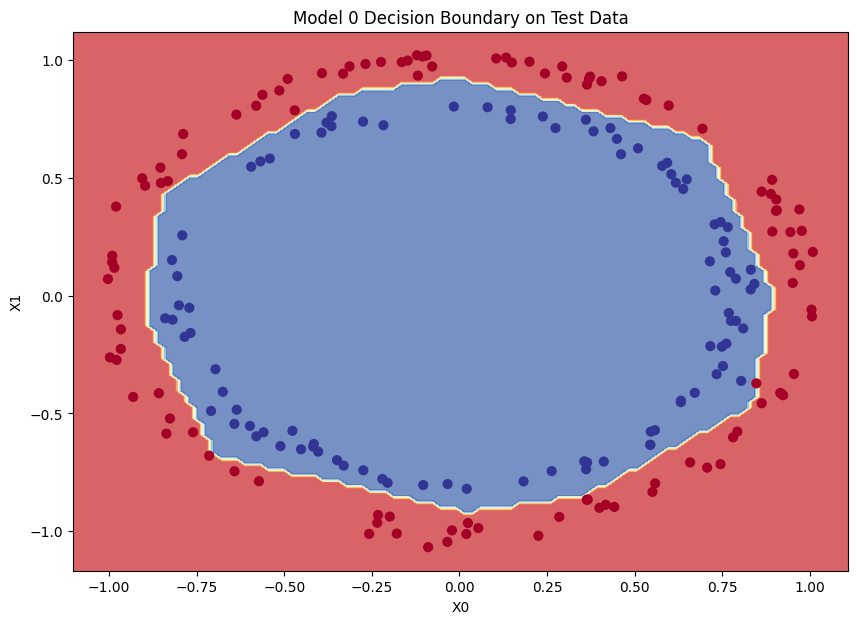

In [ ]:
# Plot the decision boundary for the trained model
plot_predictions(model_0, X_test, y_test, title="Model 0 Decision Boundary on Test Data")


Multi class classification


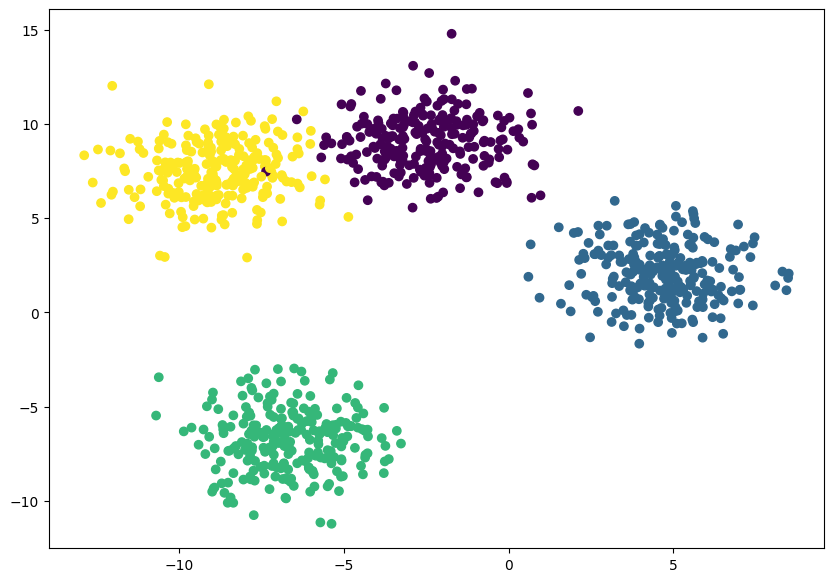

In [ ]:
#import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#creating multi class data
X_blob,y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

# TURN DATA INTO TENSORS
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


#spliting the data into traning and testing
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                  y_blob,
                                                  test_size=0.2,
                                                  random_state=RANDOM_SEED)



#visualize the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],
           X_blob[:,1],
           c = y_blob)
plt.show()

In [ ]:
import torch
from torch import nn

#Building the multicalss model

device = "cuda" if torch.cuda.is_available() else "cpu"


class BlobModelV0(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        super().__init__()


        ##creating nn.layers capable of handling the shapes of data

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )

    # forward method
    def forward(self,x):
        return self.linear_layer_stack(x)

## create an instance of blobModel and send it to the target device
model_1 = BlobModelV0(input_features=NUM_FEATURES,
                        output_features=NUM_CLASSES,
                        hidden_units=8).to(device)

##making predictions using model_1
with torch.inference_mode():
    untrained_preds = model_1(X_blob_test.to(device))
    print(f"length of preds : {len(untrained_preds)}")
    print(f"shape of preds : {untrained_preds.shape}")
    print(f"first 10 preds : {untrained_preds[:10]}")
    print(f"first 10 labels : {y_blob_test[:10]}")
    print(f"model_1.state_dict() : {model_1.state_dict()}")




length of preds : 200
shape of preds : torch.Size([200, 4])
first 10 preds : tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')
first 10 labels : tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
model_1.state_dict() : OrderedDict({'linear_layer_stack.0.weight': tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], device='cuda:0'), 'linear_layer_stack.0.bias': tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.32

In [ ]:
## setup loss function and optimizer for model_1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)


##calculate accuracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [ ]:
## Traning the model
torch.manual_seed(42)
epochs_model_1 = 6000

# Put data to target device (these lines are already here and should work, but we'll reinforce device placement inside the loop)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#forward pass
for epoch in range(epochs_model_1):
    model_1.train() # Put model in training mode

    # 1. Forward pass
    y_blob_logits = model_1(X_blob_train.to(device)) # raw logits from the model
    y_blob_pred_probs = torch.softmax(y_blob_logits, dim=1) # turn logits into prediction probabilities
    y_blob_pred = y_blob_pred_probs.argmax(dim=1) # turn prediction probabilities into prediction labels

    # 2. Calculate loss
    # Ensure y_blob_train is on the correct device for loss calculation
    loss = loss_fn(y_blob_logits, y_blob_train.to(device)) # Ensure y_blob_train is on device

    # 3. Calculate accuracy
    # Ensure y_blob_train is on the correct device for comparison
    acc = accuracy_fn(y_blob_train.to(device), y_blob_pred) # Ensure y_blob_train is on device

    # 4. Optimizer zero grad
    optimizer.zero_grad()

    # 5. Backward pass
    loss.backward()

    # 6. Optimizer step
    optimizer.step()

    # Print out what's happening every 1000 epochs
    if epoch % 1000 == 0:
        model_1.eval() # Put model in evaluation mode
        with torch.inference_mode():
            test_blob_logits = model_1(X_blob_test.to(device))
            test_blob_pred_probs = torch.softmax(test_blob_logits, dim=1)
            test_blob_pred = test_blob_pred_probs.argmax(dim=1)

            # Ensure y_blob_test is on the correct device for loss and accuracy calculation
            test_loss = loss_fn(test_blob_logits, y_blob_test.to(device))
            test_acc = accuracy_fn(y_blob_test.to(device), test_blob_pred)

            print(f"Train Loss: {loss:.4f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Train Loss: 1.1588 | Train Acc: 40.38% | Test Loss: 1.0755 | Test Acc: 48.00%
Train Loss: 0.0223 | Train Acc: 99.25% | Test Loss: 0.0110 | Test Acc: 99.50%
Train Loss: 0.0205 | Train Acc: 99.50% | Test Loss: 0.0092 | Test Acc: 99.50%
Train Loss: 0.0191 | Train Acc: 99.50% | Test Loss: 0.0079 | Test Acc: 99.50%
Train Loss: 0.0180 | Train Acc: 99.50% | Test Loss: 0.0068 | Test Acc: 100.00%
Train Loss: 0.0171 | Train Acc: 99.50% | Test Loss: 0.0057 | Test Acc: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_predictions_1(model, X, y, title="Model Decision Boundary"): # Function to plot decision boundaries
    model.to("cpu") # Move model to CPU for plotting
    X, y = X.to("cpu"), y.to("cpu")

    ## set prediction boundries and make predictions
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

    #make features for predictions
    X_to_predict_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_predict_on)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # For multi-class, use softmax and argmax

    y_pred = y_pred.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.show()

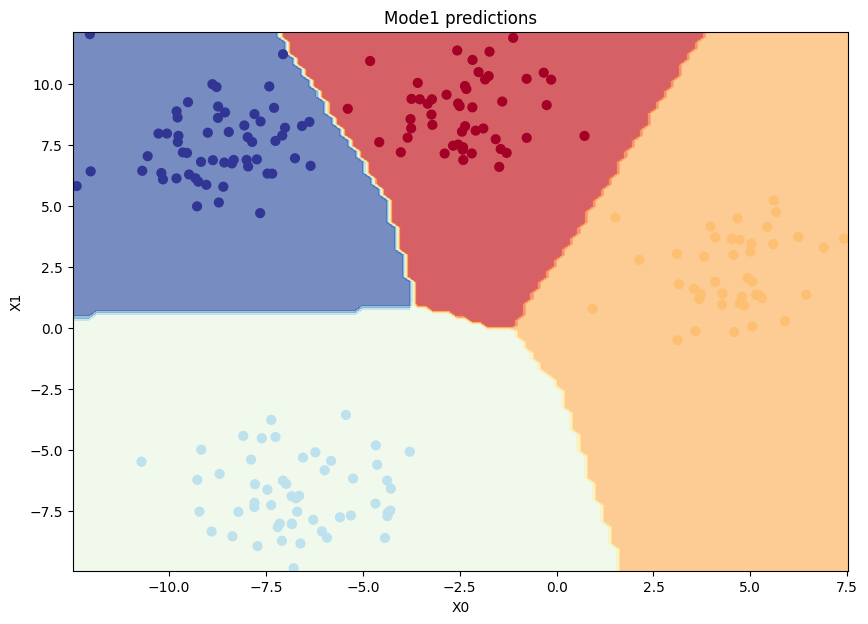

In [ ]:
## visualize the predictins
plot_predictions_1(model_1,X_blob_test,y_blob_test,title="Mode1 predictions")

In [ ]:
## hello man